In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import pandas as pd
import time
import subprocess
import pickle
from mpl_toolkits.mplot3d import Axes3D


In [2]:
algoritimos = ["./exaustiva", "./random", "./smithWaterman"]

In [6]:
#def createDnaSequences():
nao rodar novamente
seqList= list()
i=0
for n in range(1,200):
   for m in range(1,200):
        file = "dna" + str(i)
        f = open(file, 'w')


        seq=[str(n)+'\n',
             str(m)+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
        f.close()
        #seqList.append(seq)
        i += 1
        
    #return seqList

In [3]:
def roda_com_entrada(ex, in_f):
    with open(in_f) as f:
        start = time.perf_counter()
        proc = subprocess.run([ex], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

    return proc.stdout,end-start

In [4]:
timeExaustiva = list()
resultExaustiva = list()
timeLocal = list()
resultLocal = list()
timeSmithWaterman = list()
resultSmithWaterman = list()
i2 = 0

while i2< 39600:
    seq = "dna" + str(i2)
    a,b = roda_com_entrada(algoritimos[0], seq)
    timeExaustiva.append(b)
    resultExaustiva.append(a)
    c,d = roda_com_entrada(algoritimos[1], seq)
    timeLocal.append(d)
    resultLocal.append(c)
    e,f = roda_com_entrada(algoritimos[2], seq)
    timeSmithWaterman.append(e)
    resultSmithWaterman.append(f)
    i2+=100
    
    

In [18]:
# resultados do smithwaterman estao na lista errada
len(resultSmithWaterman)
tamanho1Utilizado = list()
tamanho2Utilizado = list()
tamanho1UtilizadoReal = list()
tamanho2UtilizadoReal = list()
for s1 in range(1,200):
    for s2 in range(1,200):
        tamanho1Utilizado.append(s1)
        tamanho2Utilizado.append(s2)
i3 = 1
while i3 < len(tamanho1Utilizado):
    tamanho1UtilizadoReal.append(tamanho1Utilizado[i3])
    tamanho2UtilizadoReal.append(tamanho2Utilizado[i3])
    i3+=100

Text(0.5, 0.92, 'Heuristica Smith-Waterman')

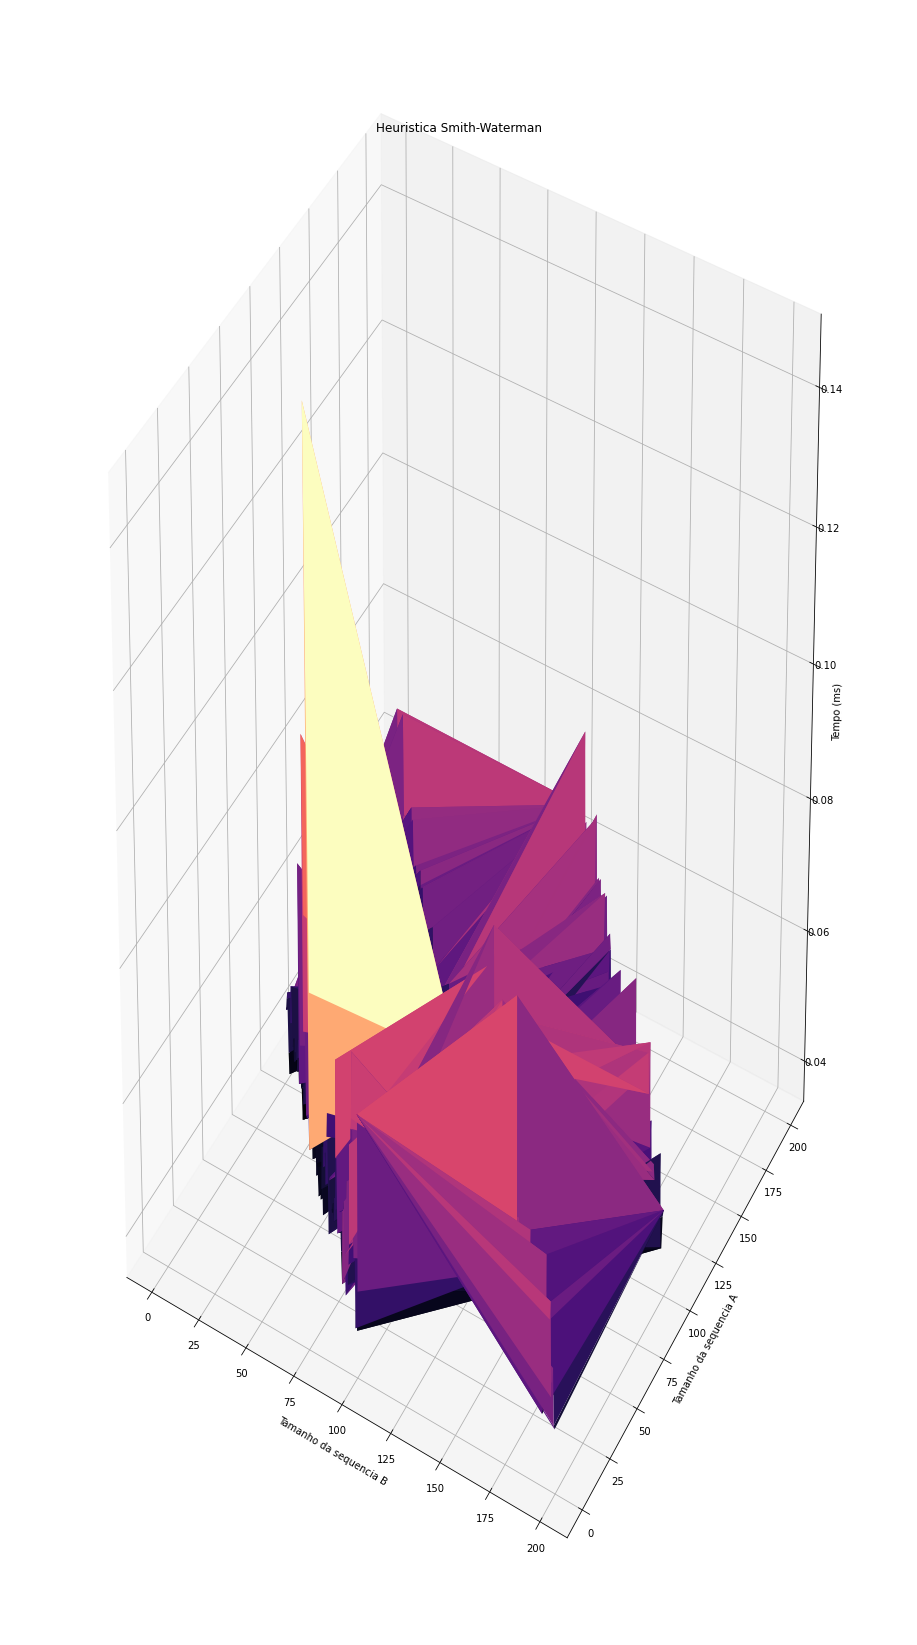

In [31]:
fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2UtilizadoReal, tamanho1UtilizadoReal, resultSmithWaterman,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (ms)')
heuristica_graph.set_title('Heuristica Smith-Waterman')

Text(0.5, 0.92, 'Busca Local')

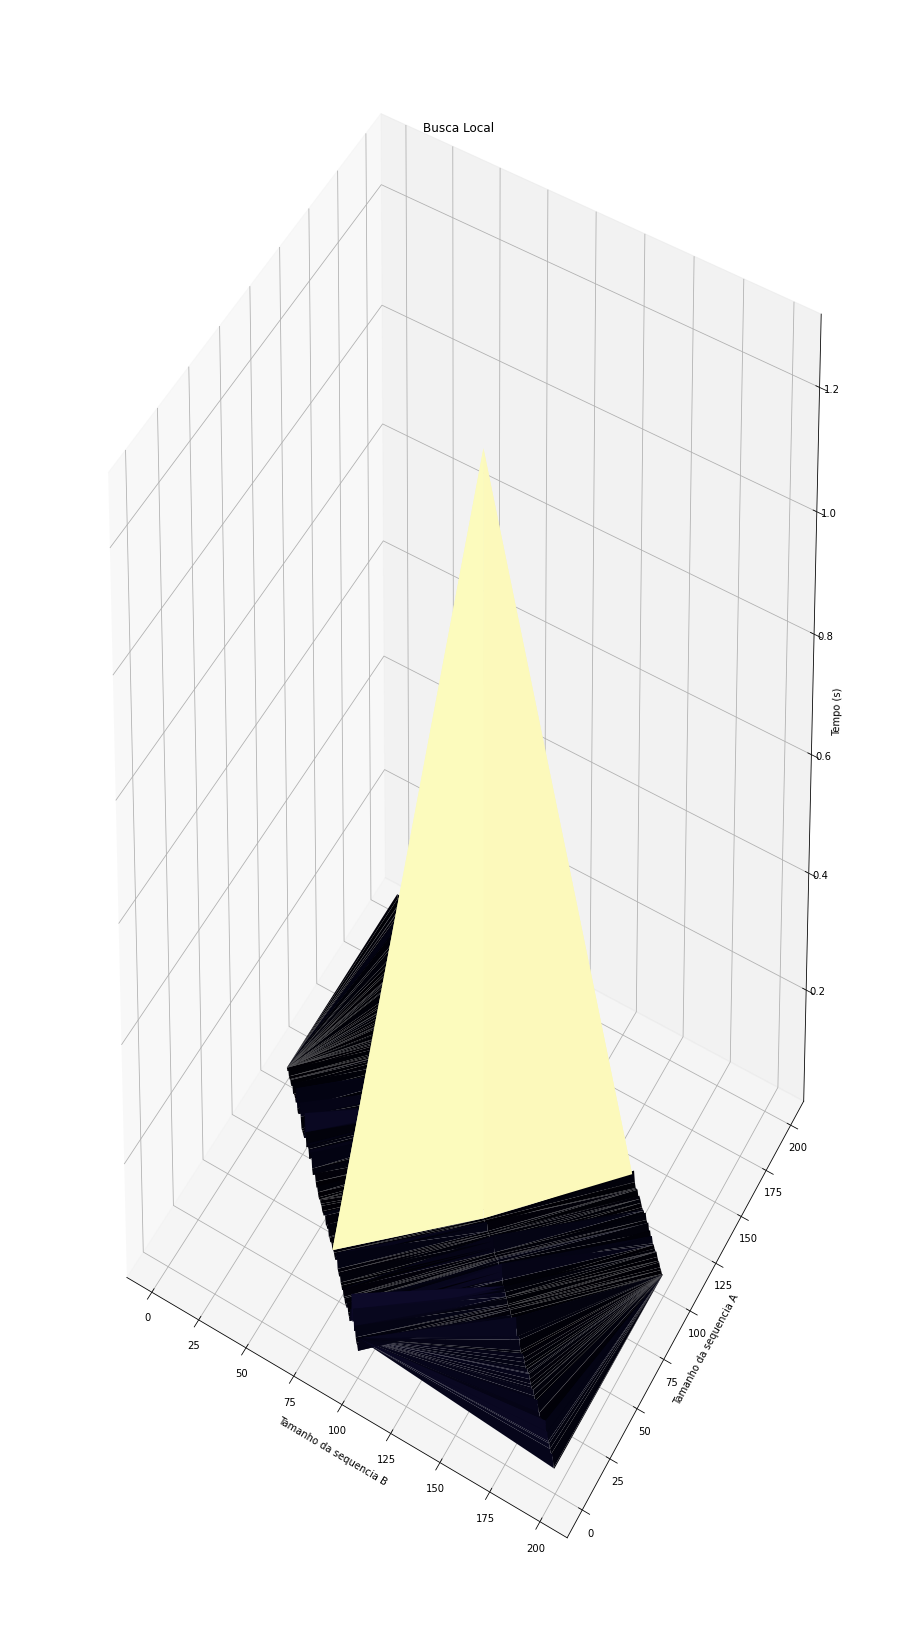

In [32]:
fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2UtilizadoReal, tamanho1UtilizadoReal, timeLocal,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (s)')
heuristica_graph.set_title('Busca Local')

Text(0.5, 0.92, 'Busca Exaustiva')

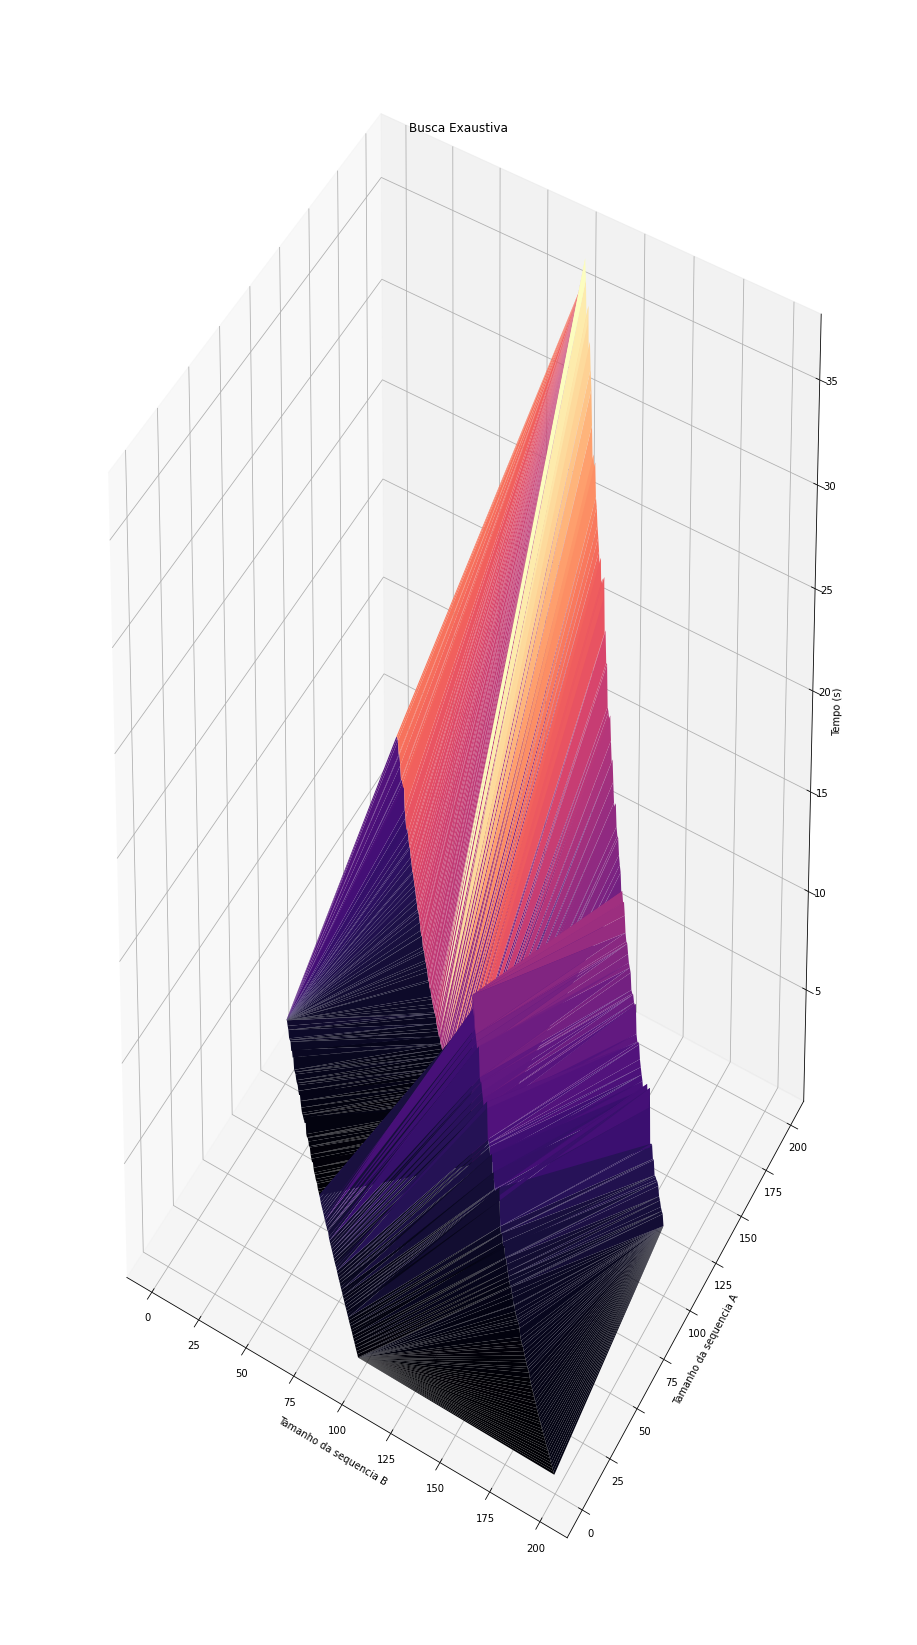

In [33]:
timeExaustiva
fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2UtilizadoReal, tamanho1UtilizadoReal, timeExaustiva,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (s)')
heuristica_graph.set_title('Busca Exaustiva')

## Smith Waterman ##

A Heurística de Smith-WaterMan é uma boa solução caso queira um balanço entre acurácia e tempo para rodar o algoritimo. O problema de utilizar essa heurística é que ela cria uma matriz m X n (tamanho da primeira sequência X tamanho da segunda sequência), assim para sequências muito grandes a matriz fica muito grande, assim pode gerar um problema para paralelizar o algoritimo, especialmente em GPUs, visto que a memória ocupada pela matriz acaba sendo muito grande podendo passar da memória para os cores.

## Busca Local ##

A Busca Local é a solução mais rápida, mas por utilizar aleatoriedade o seu resultado não é confiável 

## Busca Exaustiva ##

A Busca Exaustiva sempre retorna o resultado correto, visto que compara todas as possibilidades, com isso esssa busca é a mais demorada